# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


,Date,Births
15,1959-01-16,37
287,1959-10-15,42
74,1959-03-16,30
25,1959-01-26,43
12,1959-01-13,55
167,1959-06-17,30
215,1959-08-04,46
142,1959-05-23,45
206,1959-07-26,39
99,1959-04-10,34


In [ ]:
#importing necessary libraries
df = pd.read_csv('/content/drive/MyDrive/daily-total-female-births.csv')
df.sample(10)

,Date,Births
271,1959-09-29,51
88,1959-03-30,50
341,1959-12-08,49
8,1959-01-09,38
129,1959-05-10,34
157,1959-06-07,36
316,1959-11-13,35
23,1959-01-24,32
210,1959-07-30,36
224,1959-08-13,37


# Data Overview

In [ ]:
df.shape[0]

365

There are 365 rows in the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


We have date object and integer object

In [ ]:
#Check for duplicate value
df.duplicated().sum()

0

There are no duplicate values in the dataset

```
# This is formatted as code
```



In [ ]:
#Check for null value
df.isnull().sum()

,0
Date,0
Births,0


There are no null values in the dataset

In [ ]:
#Check for statistics of data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,365,365,1959-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Births,365.0,NaN,NaN,NaN,41.980822,7.348257,23.0,37.0,42.0,46.0,73.0


In [ ]:
upper_limit = df['Births'].quantile(0.75) +(df['Births'].quantile(0.75) - df['Births'].quantile(0.25))*1.5
lower_limit = df['Births'].quantile(0.25) -(df['Births'].quantile(0.75) - df['Births'].quantile(0.25))*1.5
print(upper_limit)
print(lower_limit)

59.5
23.5


# Exploratory Data Analysis

## Univariate Analysis

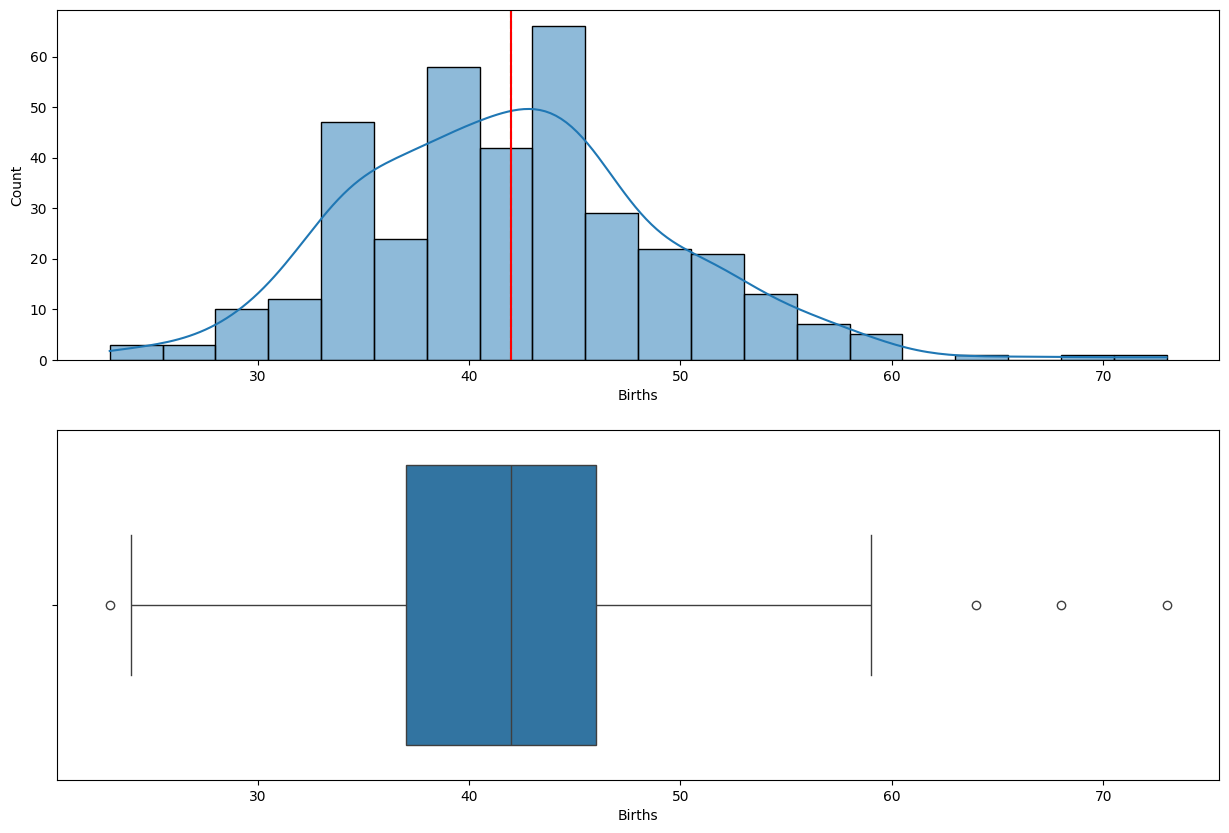

In [ ]:
f,(ax1,ax2) = plt.subplots(2,1,figsize=(15,10))

#Histplot and Boxplot to understand the distribution of births
sns.histplot(
    data=df,
    x='Births',
    kde=True,
    ax=ax1)

sns.boxplot(
    data=df,
    x='Births',
    ax=ax2)

ax1.axvline(
            df['Births'].mean(),
            color='green',
            linestyle='--')
ax1.axvline(
            df['Births'].median(),
            color='red',
            linestyle='-')

plt.show()



## Multi Variate Analysis

In [ ]:
arr = [i+1 for i in range(len(df))]

In [ ]:
df['time'] = arr

<Axes: >

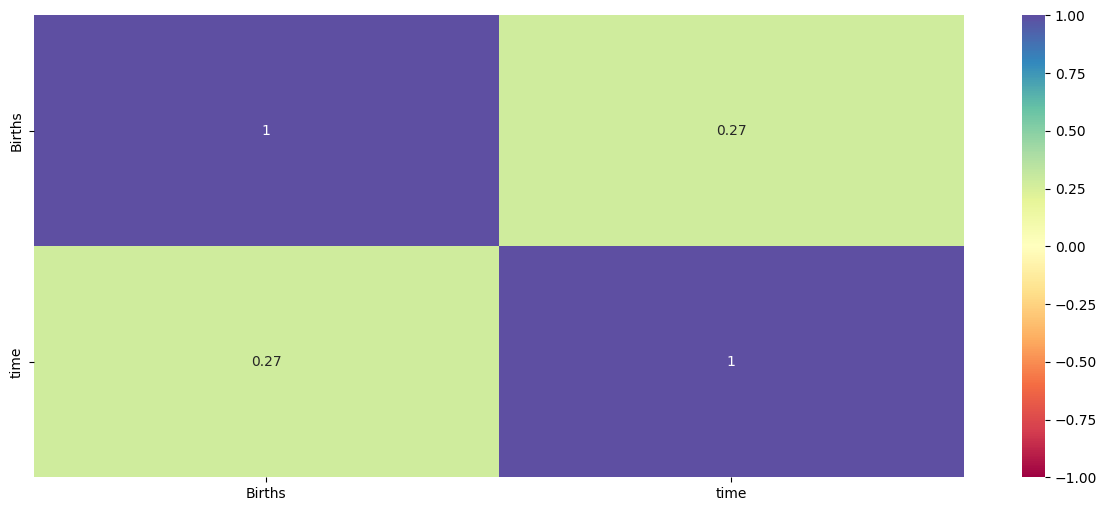

In [ ]:
sns.heatmap(
          df[['Births','time']].corr(),
          annot=True,
          cmap='Spectral',
          cbar=True,
          vmin=-1,
          vmax=1
          )

We infer that the time and births are least positively corelated.

## BiVariate Anlaysis

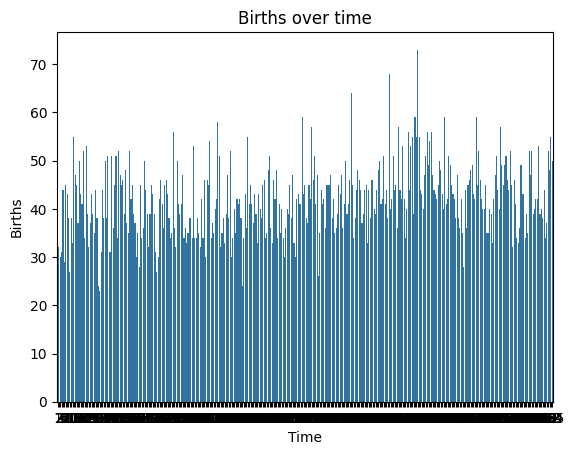

In [ ]:
sns.barplot(
    data=df,
    x='time',
    y='Births'
)
plt.title('Births over time')
plt.xlabel('Time')
plt.ylabel('Births')
plt.show()

# Time Series Analysis

In [ ]:
new_df = pd.read_csv('/content/drive/MyDrive/daily-total-female-births.csv')
df = new_df.copy()

In [ ]:
date = pd.date_range('1/1/1959',freq='D',periods=len(df))
date

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [ ]:
df['Time_stamp'] = pd.DataFrame(date,columns=['Day'])
df.head()

,Date,Births,Time_stamp
0,1959-01-01,35,1959-01-01
1,1959-01-02,32,1959-01-02
2,1959-01-03,30,1959-01-03
3,1959-01-04,31,1959-01-04
4,1959-01-05,44,1959-01-05


In [ ]:
df.set_index('Time_stamp',inplace=True,drop='Time_stamp')
df.drop('Date',axis=1,inplace=True)
df.head()

,Births
Time_stamp,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Time Series Data ready for Anlaysis.

In [ ]:
from pylab import rcParams
#rcParams['figure.figsize'] = 15, 6

<Figure size 1500x1000 with 0 Axes>

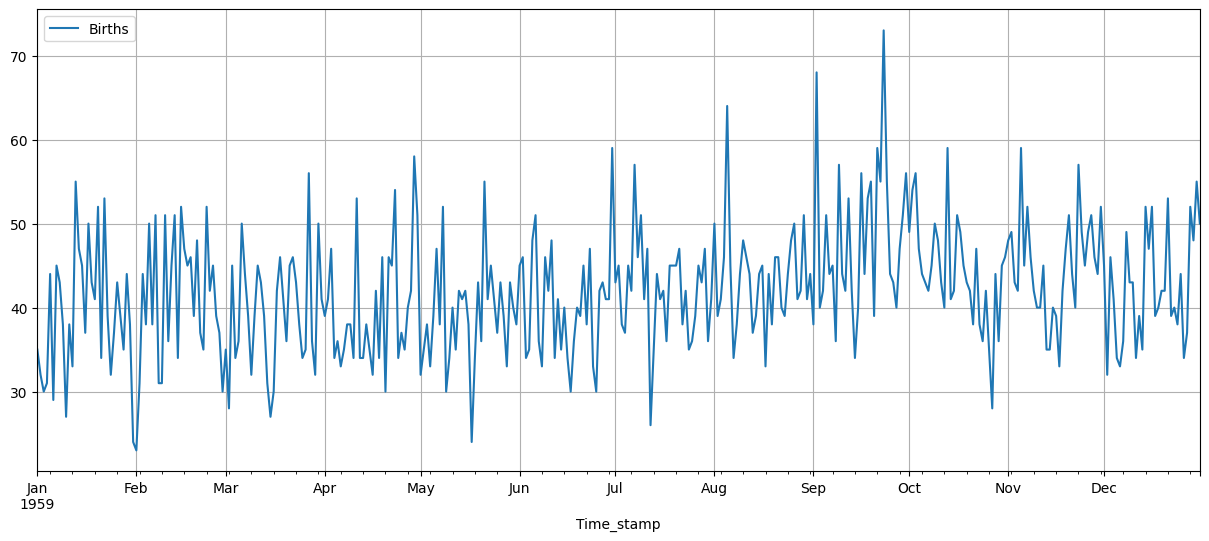

In [ ]:
plt.figure(figsize=(15,10))
df[['Births']].plot(grid=True)
plt.legend(loc='upper left')
plt.show()

# Data PreProcessing

In [ ]:
#Splitting the data into training and testing to test models on them

#Using 70% of data as training data
#Using 30% of data as testing data

In [ ]:
train = df[0:int(len(df)*0.7)]
test = df[int(len(df)*0.7):]

print('Training data sample\n',train.head(5))
print('Training data sample\n',train.tail(5))
print('Testing data sample\n',test.head(5))
print('Testing data sample\n',test.tail(5))

Training data sample
             Births  time
Time_stamp              
1959-01-01      35     1
1959-01-02      32     2
1959-01-03      30     3
1959-01-04      31     4
1959-01-05      44     5
Training data sample
             Births  time
Time_stamp              
1959-09-08      36   251
1959-09-09      57   252
1959-09-10      44   253
1959-09-11      42   254
1959-09-12      53   255
Testing data sample
             Births  time
Time_stamp              
1959-09-13      42   256
1959-09-14      34   257
1959-09-15      40   258
1959-09-16      56   259
1959-09-17      44   260
Testing data sample
             Births  time
Time_stamp              
1959-12-27      37   361
1959-12-28      52   362
1959-12-29      48   363
1959-12-30      55   364
1959-12-31      50   365


In [ ]:
test

,Births,time
Time_Stamp,,
1959-09-13,42,256
1959-09-14,34,257
1959-09-15,40,258
1959-09-16,56,259
1959-09-17,44,260
...,...,...
1959-12-27,37,361
1959-12-28,52,362
1959-12-29,48,363


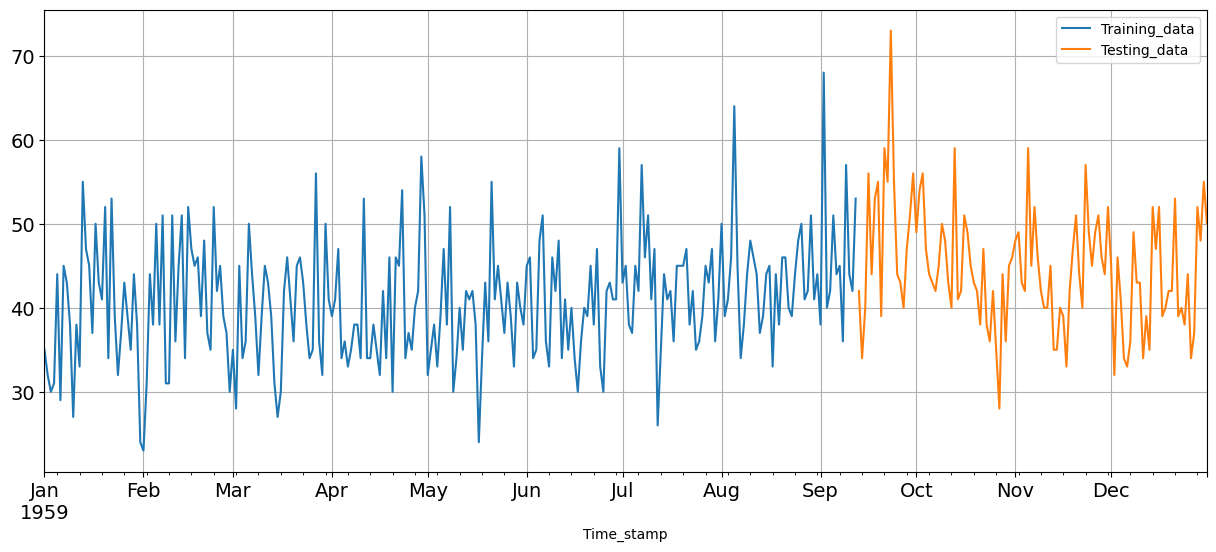

In [ ]:
#Plotting the train and test data for analysis

#plt.figure(figsize=(15,10))
train['Births'].plot(fontsize=14)
test['Births'].plot(fontsize=14)
plt.grid()
plt.legend(['Training_data','Testing_data'])
plt.show()

# Building different Models and comparing the accuracy Metrics




## Model1 : Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train[['time']],train['Births'])

train_pred_model1 = lr.predict(train[['time']])
train['RegOnTime'] = train_pred_model1

test_pred_model1 = lr.predict(test[['time']])
test['RegOnTime'] = test_pred_model1



In [ ]:
print('Training Data Sample \n',train.head(5))
print('Testing Data Sample \n',test.head(20))

Training Data Sample 
             Births  time  RegOnTime
Time_stamp                         
1959-01-01      35     1  38.175061
1959-01-02      32     2  38.195761
1959-01-03      30     3  38.216461
1959-01-04      31     4  38.237160
1959-01-05      44     5  38.257860
Testing Data Sample 
             Births  time  RegOnTime
Time_stamp                         
1959-09-13      42   256  43.453482
1959-09-14      34   257  43.474181
1959-09-15      40   258  43.494881
1959-09-16      56   259  43.515581
1959-09-17      44   260  43.536280
1959-09-18      53   261  43.556980
1959-09-19      55   262  43.577680
1959-09-20      39   263  43.598379
1959-09-21      59   264  43.619079
1959-09-22      55   265  43.639779
1959-09-23      73   266  43.660478
1959-09-24      55   267  43.681178
1959-09-25      44   268  43.701878
1959-09-26      43   269  43.722577
1959-09-27      40   270  43.743277
1959-09-28      47   271  43.763977
1959-09-29      51   272  43.784677
1959-09-30      56 

## Model 2:Linear Regression Using Ordinary least squares

In [ ]:
from statsmodels.api import OLS

ols_train = train[['Births','time']]
ols_test = test[['Births','time']]

ols = OLS(ols_train['Births'],ols_train[['time']])
ols_model = ols.fit()

train_pred_model2 = ols_model.predict(ols_train[['time']])
ols_train['RegOnTime'] = train_pred_model2

test_pred_model2 = ols_model.predict(ols_test[['time']])
ols_test['RegOnTime'] = test_pred_model2


In [ ]:
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Births   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              809.6
Date:                Thu, 30 Jan 2025   Prob (F-statistic):                    5.89e-81
Time:                        23:29:29   Log-Likelihood:                         -1128.8
No. Observations:                 255   AIC:                                      2260.
Df Residuals:                     254   BIC:                                      2263.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print('Training Data Sample \n',ols_train.head(20))
print('Testing Data Sample \n',ols_test.head(20))

Training Data Sample 
             Births  time  RegOnTime
Time_stamp                         
1959-01-01      35     1   0.244698
1959-01-02      32     2   0.489396
1959-01-03      30     3   0.734094
1959-01-04      31     4   0.978792
1959-01-05      44     5   1.223489
1959-01-06      29     6   1.468187
1959-01-07      45     7   1.712885
1959-01-08      43     8   1.957583
1959-01-09      38     9   2.202281
1959-01-10      27    10   2.446979
1959-01-11      38    11   2.691677
1959-01-12      33    12   2.936375
1959-01-13      55    13   3.181073
1959-01-14      47    14   3.425771
1959-01-15      45    15   3.670468
1959-01-16      37    16   3.915166
1959-01-17      50    17   4.159864
1959-01-18      43    18   4.404562
1959-01-19      41    19   4.649260
1959-01-20      52    20   4.893958
Testing Data Sample 
             Births  time  RegOnTime
Time_stamp                         
1959-09-13      42   256  62.642661
1959-09-14      34   257  62.887359
1959-09-15      40 

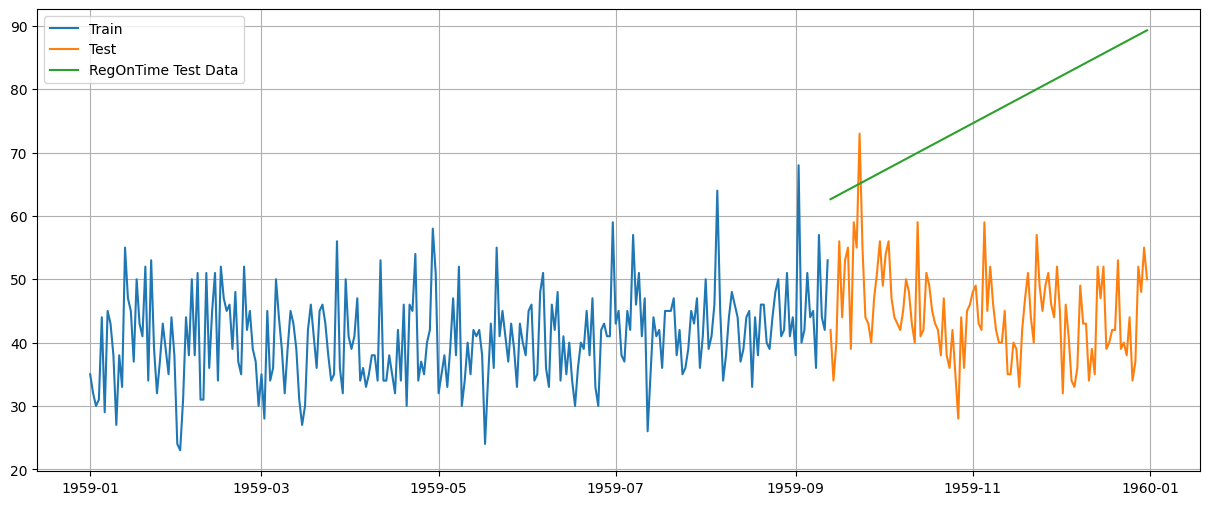

In [ ]:
plt.plot(ols_train['Births'],label='Train')
plt.plot(ols_test['Births'],label='Test')
plt.plot(ols_test['RegOnTime'],label='RegOnTime Test Data')
plt.grid()
plt.legend(loc='best')
plt.show()

### Plotting Linear Regressed Train and Test Data

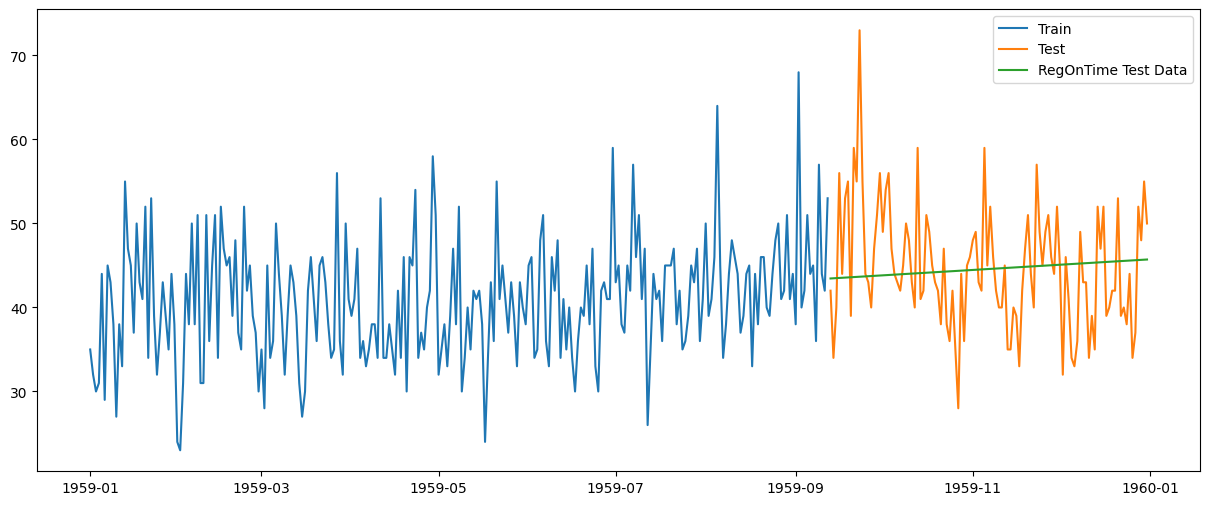

In [ ]:
plt.plot(train['Births'],label='Train')
plt.plot(test['Births'],label='Test')
plt.plot(test['RegOnTime'],label='RegOnTime Test Data')


plt.legend(loc='best')
plt.show()

### Model Evaluation Metrics

In [ ]:
from sklearn import metrics

rmse_model1_train = np.sqrt(metrics.mean_squared_error(train['Births'],train_pred_model1))
print('For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f' %rmse_model1_train)

rmse_model1_test = np.sqrt(metrics.mean_squared_error(test['Births'],test_pred_model1))
print('For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f' %rmse_model1_test)

rmse_model2_train = np.sqrt(metrics.mean_squared_error(ols_train['Births'],train_pred_model2))
print('For RegressionOnTime forecast on the OLS Train Data,  RMSE is %3.3f' %rmse_model2_train)

rmse_model2_test = np.sqrt(metrics.mean_squared_error(ols_test['Births'],test_pred_model2))
print('For RegressionOnTime forecast on the ols Test Data,  RMSE is %3.3f' %rmse_model2_test)

For RegressionOnTime forecast on the Train Data,  RMSE is 6.911
For RegressionOnTime forecast on the Test Data,  RMSE is 7.392
For RegressionOnTime forecast on the OLS Train Data,  RMSE is 20.238
For RegressionOnTime forecast on the ols Test Data,  RMSE is 33.421


In [ ]:
resultsDf1 = pd.DataFrame(
                         {
                           "Rmse Test":[rmse_model1_test]
                          },
                         index=['Linear Regression']
)
resultsDf1

,Rmse Test
Linear Regression,7.391597


In [ ]:
resultsDf2 = pd.DataFrame(
                         {
                           "Rmse Test":[rmse_model2_test]
                          },
                         index=['OLS Linear Regression']
)
resultsDf2

,Rmse Test
OLS Linear Regression,33.420557


In [ ]:
result_df = pd.concat([resultsDf1,resultsDf2])

In [ ]:
result_df

,Rmse Test
Linear Regression,7.391597
OLS Linear Regression,33.420557


## Method 3: Simple Average


In [ ]:
# We are calculating the average of entire training data and forecasting based
# on training data average

avg_train = train[['Births','time']]
avg_test = test[['Births','time']]

avg_test['mean_forecast'] = avg_train['Births'].mean()

avg_test.head(20)

,Births,time,mean_forecast
Time_stamp,,,
1959-09-13,42,256,40.803922
1959-09-14,34,257,40.803922
1959-09-15,40,258,40.803922
1959-09-16,56,259,40.803922
1959-09-17,44,260,40.803922
1959-09-18,53,261,40.803922
1959-09-19,55,262,40.803922
1959-09-20,39,263,40.803922
1959-09-21,59,264,40.803922


### Plotting Forecast Test Data for Simple Average Method

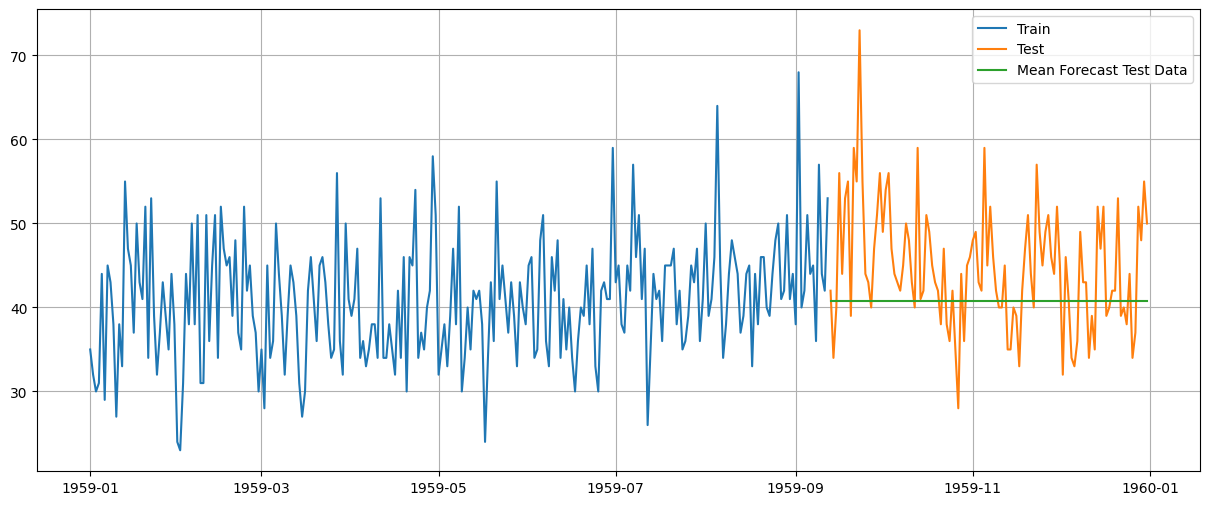

In [ ]:
## Plotting on both Training and Test data

plt.plot(avg_train['Births'],label='Train')
plt.plot(avg_test['Births'],label='Test')
plt.plot(avg_test['mean_forecast'],label='Mean Forecast Test Data')
plt.legend(loc='best')
plt.grid()
plt.show()

### Model Evaluation for Simple Average

In [ ]:

test_pred_model3 = np.sqrt(metrics.mean_squared_error(avg_test['Births'],avg_test['mean_forecast']))
#print('For Simple Average forecast on the Test Data,  RMSE is %3.3f' %rmse_model3_test)
print('RMSE for forecast model using Simple Average %3.3f'%(test_pred_model3))

RMSE for forecast model using Simple Average 8.195


In [ ]:
resultDf3 = pd.DataFrame(
    {
        "Rmse Test":[test_pred_model3]
    },
    index=['Simple Average']
)
print(resultDf3)

                Rmse Test
Simple Average   8.195469


In [ ]:
result_df = pd.concat([result_df,resultDf3])
result_df

,Rmse Test
Linear Regression,7.391597
OLS Linear Regression,33.420557
Simple Average,8.195469


## Method 4: Moving Average Method

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [ ]:
moving_avg_df = df.copy()

#Calculating rolling average for 2,4,6,9 trailing periods

moving_avg_df['Trailing_2'] = moving_avg_df['Births'].rolling(2).mean()
moving_avg_df['Trailing_4'] = moving_avg_df['Births'].rolling(4).mean()
moving_avg_df['Trailing_6'] = moving_avg_df['Births'].rolling(6).mean()
moving_avg_df['Trailing_9'] = moving_avg_df['Births'].rolling(9).mean()

moving_avg_df.head(20)

,Births,time,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_stamp,,,,,,
1959-01-01,35,1,NaN,NaN,NaN,NaN
1959-01-02,32,2,33.5,NaN,NaN,NaN
1959-01-03,30,3,31.0,NaN,NaN,NaN
1959-01-04,31,4,30.5,32.00,NaN,NaN
1959-01-05,44,5,37.5,34.25,NaN,NaN
1959-01-06,29,6,36.5,33.50,33.500000,NaN
1959-01-07,45,7,37.0,37.25,35.166667,NaN
1959-01-08,43,8,44.0,40.25,37.000000,NaN
1959-01-09,38,9,40.5,38.75,38.333333,36.333333


Let us split the data into train and test and plot this Time Series. The window of the moving average needs to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [ ]:
moving_avg_train = moving_avg_df[0:int(len(moving_avg_df)*0.7)]
moving_avg_test = moving_avg_df[int(len(moving_avg_df)*0.7):]

print('Moving Average Train Data Sample \n',moving_avg_train.head(5))
print('Moving Average Test Data Sample \n',moving_avg_test.head(5))

Moving Average Train Data Sample 
             Births  time  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_stamp                                                              
1959-01-01      35     1         NaN         NaN         NaN         NaN
1959-01-02      32     2        33.5         NaN         NaN         NaN
1959-01-03      30     3        31.0         NaN         NaN         NaN
1959-01-04      31     4        30.5       32.00         NaN         NaN
1959-01-05      44     5        37.5       34.25         NaN         NaN
Moving Average Test Data Sample 
             Births  time  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_stamp                                                              
1959-09-13      42   256        47.5       45.25   45.666667   46.000000
1959-09-14      34   257        38.0       42.75   45.333333   44.111111
1959-09-15      40   258        37.0       42.25   42.500000   43.666667
1959-09-16      56   259        48.0       43.00   44.5

### Plotting the Time Series data for Rolling average Test data with various trailing Periods

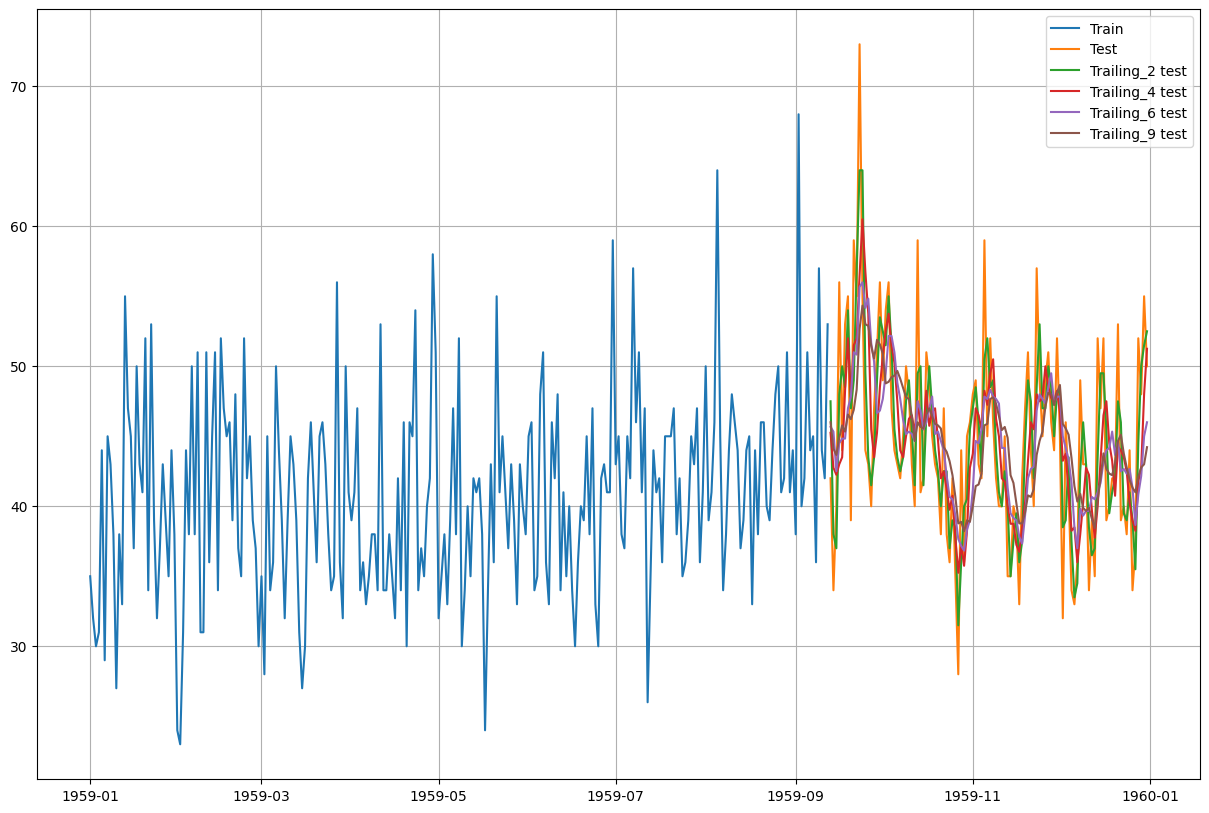

In [ ]:
## Plotting on Test data

plt.figure(figsize=(15,10))
plt.plot(moving_avg_train['Births'],label='Train')
plt.plot(moving_avg_test['Births'],label='Test')
plt.plot(moving_avg_test['Trailing_2'],label='Trailing_2 test')
plt.plot(moving_avg_test['Trailing_4'],label='Trailing_4 test')
plt.plot(moving_avg_test['Trailing_6'],label='Trailing_6 test')
plt.plot(moving_avg_test['Trailing_9'],label='Trailing_9 test')
plt.legend(loc='best')
plt.grid()
plt.show()

### Model Evaluation Metrics for Trailing Average Periods of Test Data

In [ ]:
## Test Data - RMSE  --> 2 point Trailing MA
test_pred_model4_trail2 = np.sqrt(metrics.mean_squared_error(moving_avg_test['Births'],moving_avg_test['Trailing_2']))
print('RMSE for forecast model using 2 point Trailing Average %3.3f'%(test_pred_model4_trail2))

## Test Data - RMSE  --> 4 point Trailing MA
test_pred_model4_trail4 = np.sqrt(metrics.mean_squared_error(moving_avg_test['Births'],moving_avg_test['Trailing_4']))
print('RMSE for forecast model using 4 point Trailing Average %3.3f'%(test_pred_model4_trail4))

## Test Data - RMSE  --> 6 point Trailing MA
test_pred_model4_trail6 = np.sqrt(metrics.mean_squared_error(moving_avg_test['Births'],moving_avg_test['Trailing_6']))
print('RMSE for forecast model using 6 point Trailing Average %3.3f'%(test_pred_model4_trail6))

## Test Data - RMSE  --> 9 point Trailing MA
test_pred_model4_trail9 = np.sqrt(metrics.mean_squared_error(moving_avg_test['Births'],moving_avg_test['Trailing_9']))
print('RMSE for forecast model using 9 point Trailing Average %3.3f'%(test_pred_model4_trail9))

RMSE for forecast model using 2 point Trailing Average 4.158
RMSE for forecast model using 4 point Trailing Average 5.531
RMSE for forecast model using 6 point Trailing Average 6.109
RMSE for forecast model using 9 point Trailing Average 6.502


In [ ]:
result_df_4 = pd.DataFrame(
                            {
                              "Rmse Test":[test_pred_model4_trail2,
                              test_pred_model4_trail4,
                              test_pred_model4_trail6,
                              test_pred_model4_trail9]
    },
    index=['2PointTrailMovingAverage','4PointTrailMovingAverage',
           '6PointTrailMovingAverage','9PointTrailMovingAverage']
)

In [ ]:
result_df = pd.concat([result_df,result_df_4])
result_df

,Rmse Test
Linear Regression,7.391597
OLS Linear Regression,33.420557
Simple Average,8.195469
2PointTrailMovingAverage,4.157961
4PointTrailMovingAverage,5.531470
6PointTrailMovingAverage,6.109316
9PointTrailMovingAverage,6.502145


### Infrence

We infer that Moving Average with trailing period of 2 gives the least RMSE value.
So we infer Moving Average with trailing period of 2 gives best results for testing

# Plotting the Time Series data for all 4 Methods w.r.to train and test data


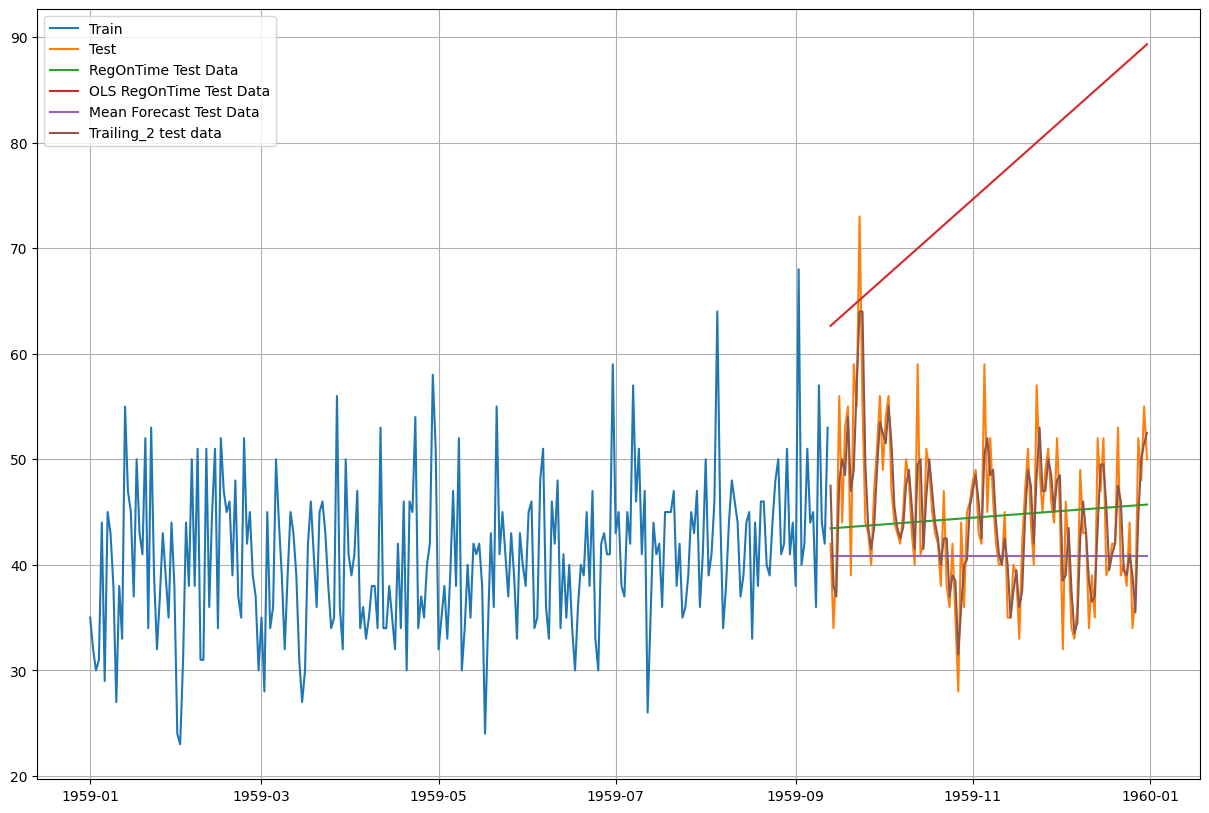

In [ ]:
## Plotting on both Training and Test data

plt.figure(figsize=(15,10))

plt.plot(train['Births'],label='Train')
plt.plot(test['Births'],label='Test')

plt.plot(test['RegOnTime'],label='RegOnTime Test Data')
plt.plot(ols_test['RegOnTime'],label='OLS RegOnTime Test Data')
plt.plot(avg_test['mean_forecast'],label='Mean Forecast Test Data')
plt.plot(moving_avg_test['Trailing_2'],label='Trailing_2 test data')

plt.legend(loc='best')
plt.grid()
plt.show()

# Conclusion

We infer that forecasting based on Rolling average with a trailing period of
2 days has the least RMSE values and produces the best nearest match forecast.